#K-means clustering


In [ ]:
import pandas as pd
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=df.iloc[:,[0,1,2,3]].values

In [ ]:
iris_setosa=df.loc[df['target']=="Iris-setosa"]
iris_versicolor=df.loc[df['target']=="Iris-versicolor"]
iris_verginica=df.loc[df['target']=="Iris-verginica"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
#finding optimum number of clusters for k-means clustering
wcss=[]
for i in range(1,11):
   kmeans=KMeans(n_clusters=i,init="k-means++", max_iter=300, n_init=10, random_state=0)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)

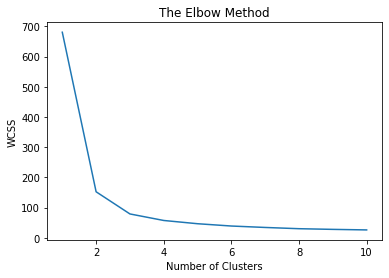

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means=kmeans.fit_predict(X)

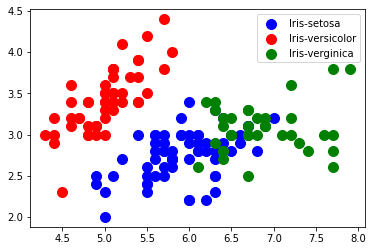

In [ ]:
plt.scatter(X[y_means==0,0],X[y_means==0,1], s=100,c='blue', label='Iris-setosa')
plt.scatter(X[y_means==1,0],X[y_means==1,1], s=100,c='red', label='Iris-versicolor')
plt.scatter(X[y_means==2,0],X[y_means==2,1], s=100,c='green', label='Iris-verginica')
plt.legend()

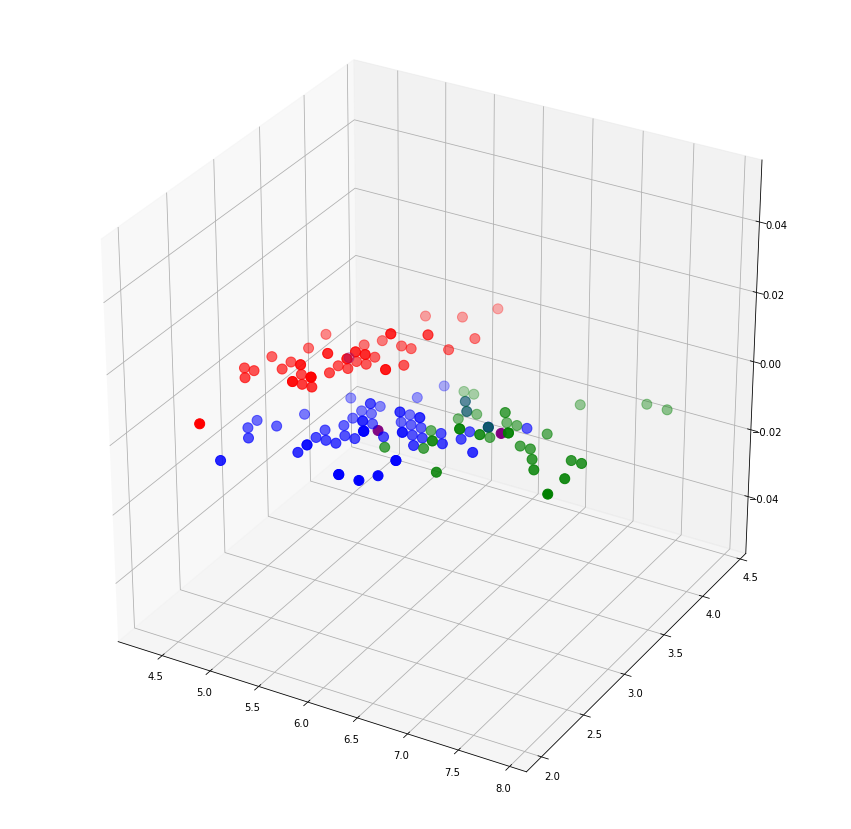

In [ ]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
plt.scatter(X[y_means==0,0],X[y_means==0,1], s=100,c='blue', label='Iris-setosa')
plt.scatter(X[y_means==1,0],X[y_means==1,1], s=100,c='red', label='Iris-versicolor')
plt.scatter(X[y_means==2,0],X[y_means==2,1], s=100,c='green', label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='purple', label='Centroids')
plt.show()

In [ ]:
#using customers dataset

In [ ]:
import pandas as pd
data = pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


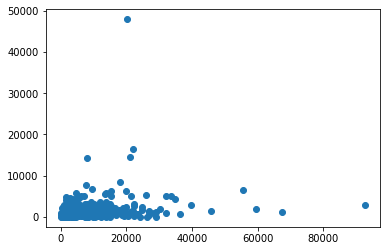

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(data.Grocery, data.Delicassen)

In [ ]:
from sklearn.cluster import KMeans
k_range = range(1, 101)
wcss = []
for k in k_range:
    km = KMeans(n_clusters=k, init = "k-means++", random_state = 7)
    km.fit(data)
    wcss.append(km.inertia_)
wcss

[157595857524.96133,
 113217528878.79834,
 80332414178.02908,
 64855545845.90139,
 52928149261.51565,
 46774259135.50634,
 41577557094.70767,
 36168416257.31857,
 32849857977.187996,
 29649182111.522404,
 28535519035.77743,
 26421923020.376877,
 25001288271.22751,
 23508772289.580025,
 21605833378.386665,
 20576532696.155266,
 18590829481.063503,
 18056817850.3863,
 16940409944.542835,
 15628623775.322254,
 15102597481.901829,
 14359467118.121069,
 13770462503.10919,
 13310850145.015812,
 12447793672.877909,
 11844604861.997543,
 11503813265.892616,
 10921641210.985657,
 10775281738.644938,
 10466389291.676746,
 9799111666.696058,
 9805184521.22207,
 9296694254.411861,
 9199819534.08755,
 8901921761.1203,
 8479036174.667025,
 8355719397.22896,
 8186355654.131277,
 7913748820.994629,
 7650625191.295879,
 7520149608.123473,
 7362624441.648268,
 7053337890.960714,
 7040290182.993589,
 6798156600.650776,
 6813783256.494793,
 6443176219.619133,
 6442501834.801285,
 6314540661.396271,
 61040

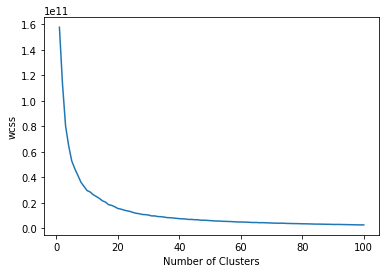

In [ ]:
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.plot(k_range, wcss)

In [ ]:
km1 = KMeans(n_clusters = 3)
y_pred=km1.fit_predict(data)
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
data['Cluster']=y_pred
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


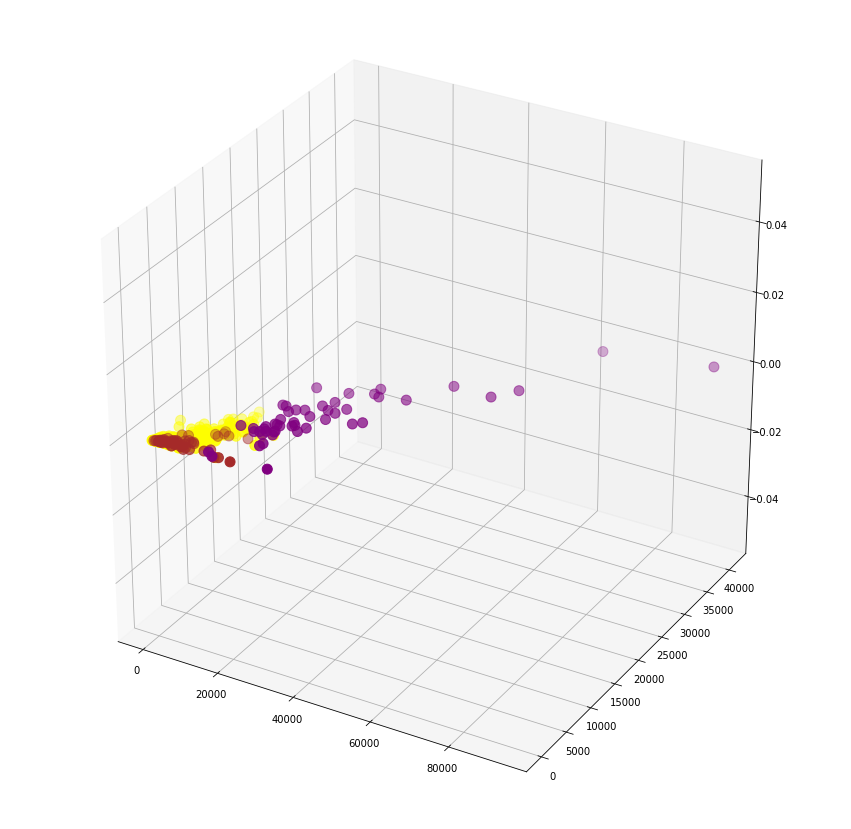

In [ ]:
df1 = data[data.Cluster==0]
df2 = data[data.Cluster==1]
df3 = data[data.Cluster==2]

fig = plt.figure(figsize = (15,15))
ax=fig.add_subplot(111, projection='3d')

plt.scatter(df1.Grocery, df1.Detergents_Paper, c='yellow', s=100)
plt.scatter(df2.Grocery, df2.Detergents_Paper, c='purple', s=100)
plt.scatter(df3.Grocery, df3.Detergents_Paper, c='brown', s=100)

plt.show()